# Train a classifier

Follow the instruction [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

In [1]:
# imports
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# build transform pipeline
transform = transforms.Compose(
    [transforms.ToTensor(), # convert value to [0,1]
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # normalize three channels to [-1,1]

# get training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# get testing data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# define classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


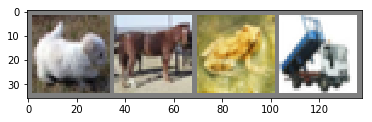

  dog horse  frog truck


In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
# define a CNN
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 34, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(34, 50, 3, padding=1)
        self.fc1 = nn.Linear(50 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 50 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
# define loss funcition and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
# use GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# transfer model to GPU
net.to(device)

Net(
  (conv1): Conv2d(3, 34, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(34, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3200, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
# train network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # transfer batch data onto GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.050
[1,  4000] loss: 1.653
[1,  6000] loss: 1.479
[1,  8000] loss: 1.369
[1, 10000] loss: 1.299
[1, 12000] loss: 1.218
[2,  2000] loss: 1.110
[2,  4000] loss: 1.059
[2,  6000] loss: 1.021
[2,  8000] loss: 1.020
[2, 10000] loss: 0.983
[2, 12000] loss: 0.969
[3,  2000] loss: 0.847
[3,  4000] loss: 0.842
[3,  6000] loss: 0.842
[3,  8000] loss: 0.829
[3, 10000] loss: 0.819
[3, 12000] loss: 0.820
[4,  2000] loss: 0.675
[4,  4000] loss: 0.687
[4,  6000] loss: 0.718
[4,  8000] loss: 0.690
[4, 10000] loss: 0.710
[4, 12000] loss: 0.697
[5,  2000] loss: 0.531
[5,  4000] loss: 0.564
[5,  6000] loss: 0.585
[5,  8000] loss: 0.607
[5, 10000] loss: 0.594
[5, 12000] loss: 0.612
[6,  2000] loss: 0.422
[6,  4000] loss: 0.441
[6,  6000] loss: 0.472
[6,  8000] loss: 0.501
[6, 10000] loss: 0.484
[6, 12000] loss: 0.507
[7,  2000] loss: 0.326
[7,  4000] loss: 0.348
[7,  6000] loss: 0.379
[7,  8000] loss: 0.389
[7, 10000] loss: 0.425
[7, 12000] loss: 0.430
[8,  2000] loss: 0.262
[8,  4000] 

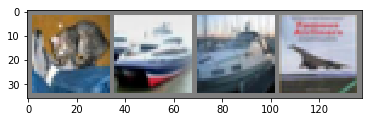

GroundTruth:    cat  ship  ship plane


In [8]:
# load test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
# make predicition        
images = images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# print out preditions
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [10]:
# evaluate the model on the whole dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


In [11]:
# take a deeper look into the performance on each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 89 %
Accuracy of  bird : 56 %
Accuracy of   cat : 56 %
Accuracy of  deer : 62 %
Accuracy of   dog : 61 %
Accuracy of  frog : 81 %
Accuracy of horse : 77 %
Accuracy of  ship : 83 %
Accuracy of truck : 64 %
